# Quantum machine learning 
A model that is used to learn the sine function in the interval 0 to 2*pi

The model incorporates a variational layer with parameterized quantum gates (RX, RY, RZ) applied to qubits. 
This allows the model to flexibly represent a wide range of quantum states, which can be tuned to fit the data during training. This flexibility allows the quantum circuit to approximate the target function (sine wave) more effectively.

Iteration 1: Cost = 1.455451
Iteration 51: Cost = 0.029757
Iteration 101: Cost = 0.000248
Iteration 151: Cost = 0.000032
Iteration 201: Cost = 0.000016
Iteration 251: Cost = 0.000009
Iteration 301: Cost = 0.000005
Iteration 351: Cost = 0.000003
Iteration 401: Cost = 0.000002
Iteration 451: Cost = 0.000001
Final Cost: 0.000001


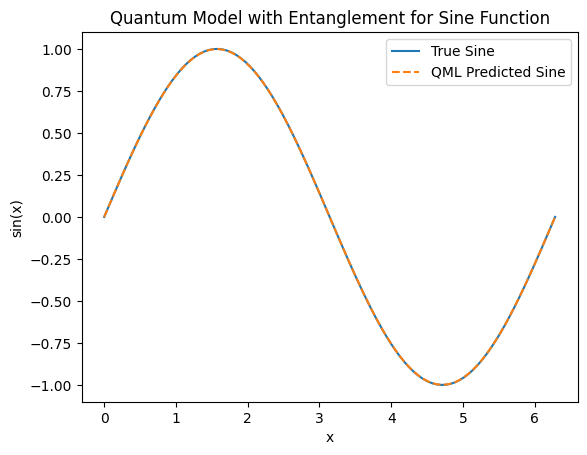

In [2]:
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np
import matplotlib.pyplot as plt
from pennylane.optimize import AdamOptimizer

# 1. Discretize the Interval [0, 2π]
N = 100
x = np.linspace(0, 2 * np.pi, N)
y = np.sin(x)

# 2. Defines the quantum variational layer using RX, RY, RZ on the 2 qubits and the both wires are entangled
# to enhance the quantum model's ability to learn complex patterns.
# Using default.qubit as the quantum device with 2 qubits.
dev = qml.device("default.qubit", wires=2)

def variational_layer(params, wires):
    qml.RX(params[0], wires=wires[0])
    qml.RY(params[1], wires=wires[0])
    qml.RZ(params[2], wires=wires[0])
    qml.RX(params[3], wires=wires[1])
    qml.RY(params[4], wires=wires[1])
    qml.RZ(params[5], wires=wires[1])
    qml.CNOT(wires=wires)  # Entanglement

# 3. Create a Qnode to run the model on the device.
# quantum model incorporating a variational layer and returning the expectation value of a measurement.
@qml.qnode(dev)
def quantum_circuit(params, x):
    qml.RX(x, wires=0)
    variational_layer(params[:6], wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# 4. Define the Cost Function
# Mean Squared Error between the quantum circuit's output and the sine values
def cost(params):
    predictions = pnp.array([quantum_circuit(params, xi) for xi in x])
    return pnp.mean((predictions - y) ** 2)

# 5. Initializes the quantum model's parameters randomly and trains the model over 500 iterations using the Adam optimizer,
#minimizing the cost function to improve the model's accuracy.

np.random.seed(42)
params = pnp.random.randn(6, requires_grad=True)

# Define the optimizer and training loop
optimizer = AdamOptimizer(stepsize=0.05)
max_iterations = 500
cost_history = []

for it in range(max_iterations):
    params, cost_val = optimizer.step_and_cost(cost, params)
    cost_history.append(cost_val)
    if it % 50 == 0:
        print(f"Iteration {it + 1}: Cost = {cost_val:.6f}")

print(f"Final Cost: {cost_val:.6f}")

# 6. Evaluate the Model
# Generate predictions using the trained quantum circuit
predictions = np.array([quantum_circuit(params, xi) for xi in x])

# Plot the true sine function and the QML model's predictions
plt.plot(x, y, label='True Sine')
plt.plot(x, predictions, label='QML Predicted Sine', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Quantum Model with Entanglement for Sine Function')
plt.show()
